<a href="https://colab.research.google.com/github/Doclikam/Capstone-project-Stroke-Risk-Factors/blob/main/Stroke_Risk_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing libraries**

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **Load the csv data**

In [176]:
study_population=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [177]:
study_population.shape

(5110, 12)

In [178]:
study_population.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [179]:
study_population.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [180]:
study_population.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [181]:
study_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [182]:
study_population.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## **Checking for missing values**

In [183]:
study_population.isnull().sum()
#bmi column has missing values: drop the missing values.


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [184]:
study_population=study_population.dropna(axis=0)

study_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


# **Mapping values**

In [185]:
study_population.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [186]:
study_population.heart_disease=study_population.heart_disease.map({1:'yes',0:'no'})


In [91]:
study_population.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,yes,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,no,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,no,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,no,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [187]:
study_population.stroke=study_population.stroke.map({1:'yes',0:'no'})
study_population.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,yes,Yes,Private,Urban,228.69,36.6,formerly smoked,yes
2,31112,Male,80.0,0,yes,Yes,Private,Rural,105.92,32.5,never smoked,yes
3,60182,Female,49.0,0,no,Yes,Private,Urban,171.23,34.4,smokes,yes
4,1665,Female,79.0,1,no,Yes,Self-employed,Rural,174.12,24.0,never smoked,yes
5,56669,Male,81.0,0,no,Yes,Private,Urban,186.21,29.0,formerly smoked,yes


In [188]:
study_population.hypertension=study_population.hypertension.map({1:'yes',0:'no'})

In [135]:
study_population.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,no,yes,Yes,Private,Urban,228.69,36.6,formerly smoked,yes
2,31112,Male,80.0,no,yes,Yes,Private,Rural,105.92,32.5,never smoked,yes
3,60182,Female,49.0,no,no,Yes,Private,Urban,171.23,34.4,smokes,yes
4,1665,Female,79.0,yes,no,Yes,Self-employed,Rural,174.12,24.0,never smoked,yes
5,56669,Male,81.0,no,no,Yes,Private,Urban,186.21,29.0,formerly smoked,yes


## **Dataframe of individuals with stroke**

In [189]:
strokes=study_population[study_population['stroke']=='yes']

strokes.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
238,1836,Female,51.0,yes,no,Yes,Private,Urban,88.20,28.4,never smoked,yes
239,32221,Male,60.0,no,yes,Yes,Private,Urban,91.92,35.9,smokes,yes
240,10548,Male,66.0,no,no,Yes,Private,Rural,76.46,21.2,formerly smoked,yes
241,52282,Male,57.0,no,no,Yes,Private,Rural,197.28,34.5,formerly smoked,yes
242,45535,Male,68.0,no,no,Yes,Private,Rural,233.94,42.4,never smoked,yes
243,40460,Female,68.0,yes,yes,Yes,Private,Urban,247.51,40.5,formerly smoked,yes
244,17739,Male,57.0,no,no,Yes,Private,Rural,84.96,36.7,Unknown,yes
245,49669,Female,14.0,no,no,No,children,Rural,57.93,30.9,Unknown,yes
246,27153,Female,75.0,no,no,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,yes
248,43424,Female,78.0,no,no,Yes,Private,Rural,78.81,19.6,Unknown,yes


## **Comparing the Risk of Stroke by Age**

In [190]:
strokes['age'].tail(20)

228    39.0
229    80.0
230    81.0
231    79.0
232    73.0
233    77.0
234    78.0
235    68.0
236    57.0
237    77.0
238    51.0
239    60.0
240    66.0
241    57.0
242    68.0
243    68.0
244    57.0
245    14.0
246    75.0
248    78.0
Name: age, dtype: float64

In [191]:
strokes['age'].astype('int')

0      67
2      80
3      49
4      79
5      81
       ..
243    68
244    57
245    14
246    75
248    78
Name: age, Length: 209, dtype: int64

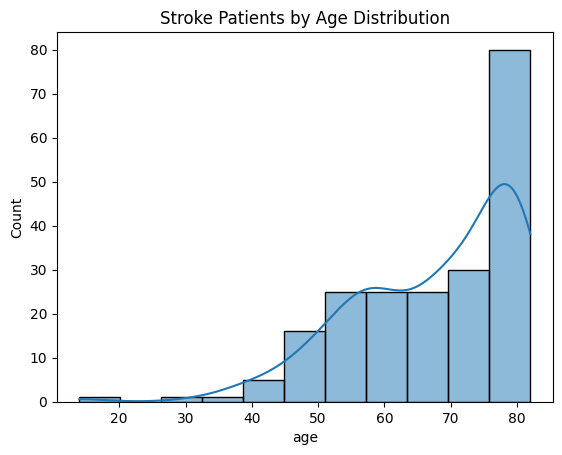

In [197]:
sns.histplot(data=strokes, x='age', kde= True)
plt.title('Stroke Patients by Age Distribution')
plt.show()

# **Comparing Risk of Stroke by Gender**

In [200]:
 strokes['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
plt.pie()

## **Compare the Risk of Stroke by Age and Gender**

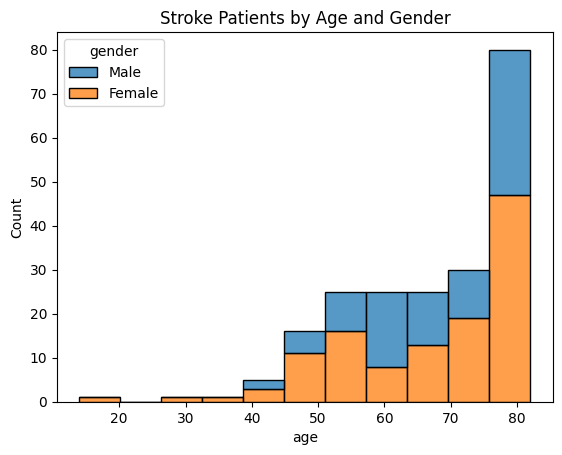

In [209]:
sns.histplot(data=strokes,x='age', hue='gender', multiple='stack')
plt.title('Stroke Patients by Age and Gender')
plt.show()


<Axes: xlabel='age', ylabel='gender'>

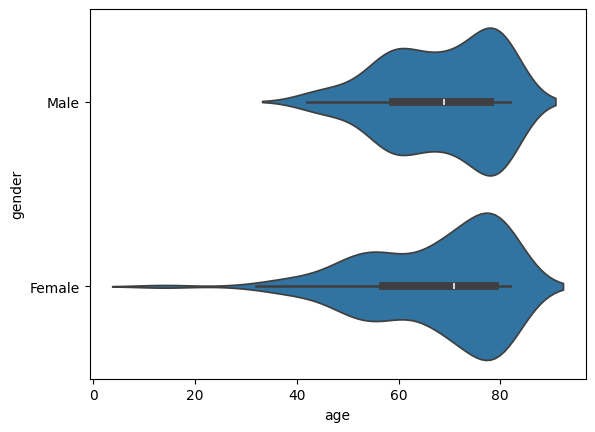

In [210]:
sns.violinplot(data=strokes, x='age', y='gender')